# Train test split


In [18]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

from sklearn import  metrics

Rozważmy następujący zbiór punktów:

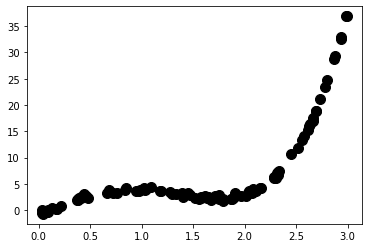

In [19]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,0.3).rvs(len(x))
plt.plot(x, y, 'ok', ms=10)
plt.show()

# Przykład
Podziel zbiór danych na część testową i treningową. 
Naucz model na części treningowej i ocen wyniki na części testowej.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60,) (60,)
(40,) (40,)


In [21]:
X_train=np.vstack(X_train)
X_test=np.vstack(X_test)

In [22]:
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model2.fit(X_train, y_train)
model2.predict(X_test)

array([ 1.96424229e+01,  6.59872278e-01,  9.57208884e-01,  2.13874812e+01,
        7.53306492e+00,  7.16508759e-01,  2.06666550e-01,  1.82627271e+01,
       -5.29049534e-01,  5.52067085e-01, -3.88001548e-01,  2.38545890e+00,
        1.75661813e+01,  2.94860690e+00,  7.92310247e+00,  4.38586408e+00,
        2.07391743e+01,  2.96504494e+00,  1.26192324e-02,  1.50815295e+01,
        3.39809952e+00,  8.63233212e+00,  4.13782174e+00,  2.57995182e+01,
        1.63325305e+00,  2.26648423e+00,  1.20363476e+00,  1.16260799e+00,
        1.71593823e+01,  5.24829869e-01,  1.07903759e+01,  3.70550366e+00,
        2.45070549e+01, -7.99344187e-01,  6.60268165e+00,  4.89077339e+00,
       -1.06977706e-01,  1.08268627e+01, -6.09963247e-01,  3.77821221e+00])

In [23]:
def show_model_stats(model, X_test, y_test):
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model.predict(X_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model.predict(X_test)) ))

show_model_stats(model2, X_test, y_test)

Explained variance score: 0.8361300220567034
Explained variance score: 0.8361300220567034
Median absolute error: 2.818006088016912
Mean squared error: 13.335200623137524
Mean absolute errors: 3.0152619467501403


# Zadanie
Wylicz powyższe miary na zbiorze testowym dla wszystkich modeli nauczonych na trainie:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

In [25]:
polynomial_array = [1,2,3,4,5,25]

for i in polynomial_array:
    print(i)
    X_train = np.vstack(X_train)
    X_test = np.vstack(X_test)

    curr_model = make_pipeline(PolynomialFeatures(i), LinearRegression())
    curr_model.fit(X_train, y_train)
    curr_model.predict(X_test)
    show_model_stats(curr_model, X_test, y_test)


1
Explained variance score: 0.5319753893462107
Explained variance score: 0.5319753893462107
Median absolute error: 3.337113904529815
Mean squared error: 38.11142015473399
Mean absolute errors: 4.7765067901017115
2
Explained variance score: 0.8361300220567034
Explained variance score: 0.8361300220567034
Median absolute error: 2.818006088016912
Mean squared error: 13.335200623137524
Mean absolute errors: 3.0152619467501403
3
Explained variance score: 0.9874203537376282
Explained variance score: 0.9874203537376282
Median absolute error: 0.8680636343682377
Mean squared error: 1.0212765646111153
Mean absolute errors: 0.8589128825106099
4
Explained variance score: 0.9987726133807826
Explained variance score: 0.9987726133807826
Median absolute error: 0.22876965869914545
Mean squared error: 0.10950382726639558
Mean absolute errors: 0.27923121718000665
5
Explained variance score: 0.9987858704761733
Explained variance score: 0.9987858704761733
Median absolute error: 0.22818292132322782
Mean squa